📂 Please upload 'heart.csv' from your local machine...


Saving heart.csv to heart.csv

✅ Dataset 'heart.csv' loaded successfully!


📊 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

🔍 First 5 Records:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   

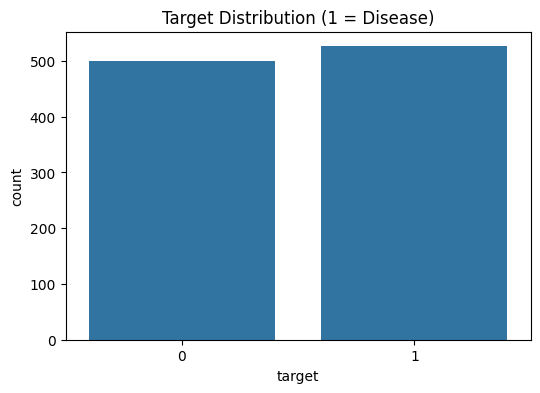

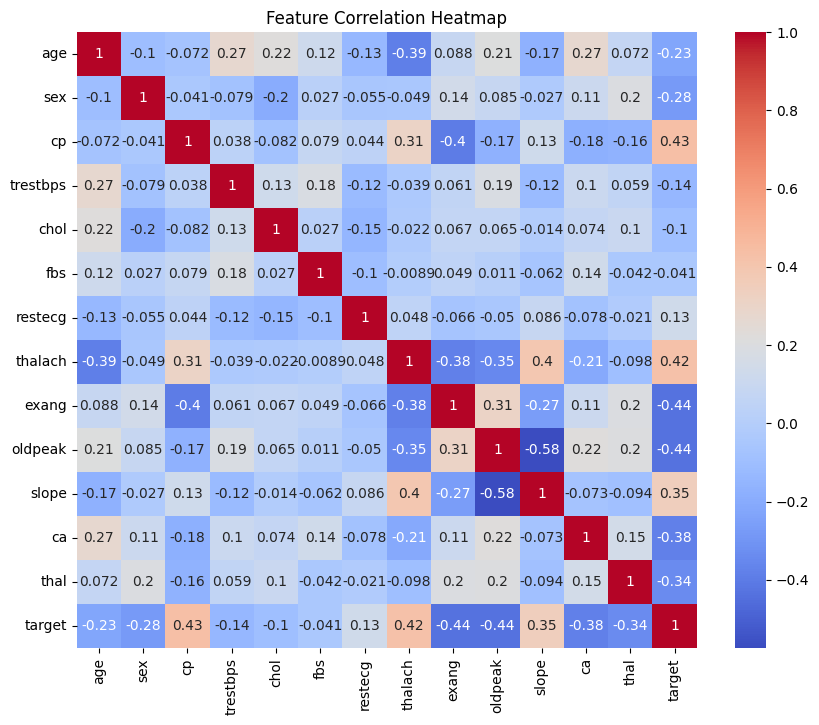

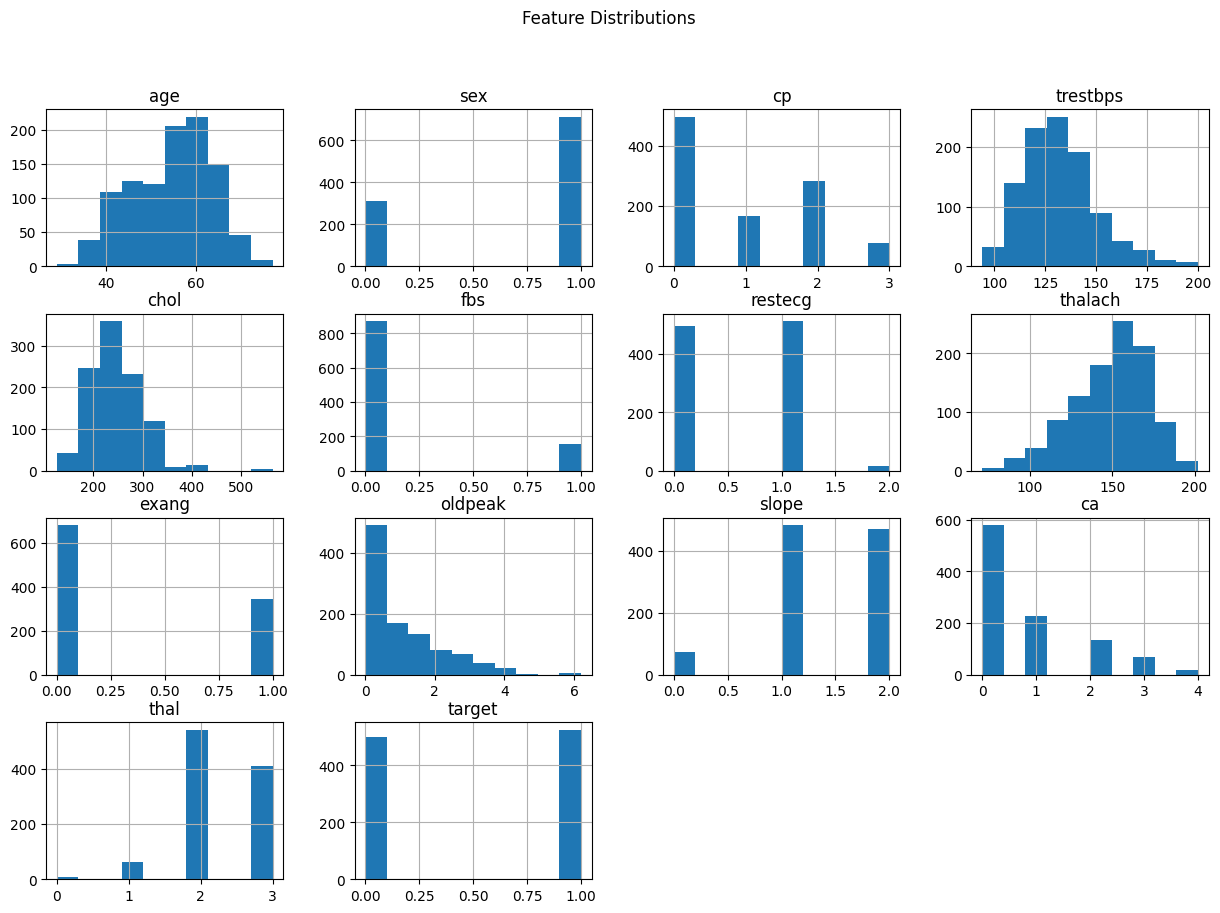


⚙️ Preprocessing data...
After SMOTE - Class distribution: [526 526]
✅ Training set: (841, 13), Test set: (211, 13)

🔧 Training Logistic Regression...

📈 Logistic Regression Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.88      0.71      0.79       106
           1       0.75      0.90      0.82       105

    accuracy                           0.81       211
   macro avg       0.82      0.81      0.80       211
weighted avg       0.82      0.81      0.80       211



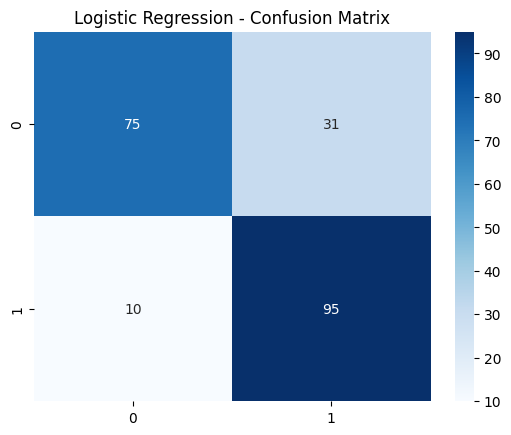

F1 Score: 0.8225
ROC AUC Score: 0.9163

🔧 Training SVM...

📈 SVM Evaluation Metrics:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       106
           1       0.96      1.00      0.98       105

    accuracy                           0.98       211
   macro avg       0.98      0.98      0.98       211
weighted avg       0.98      0.98      0.98       211



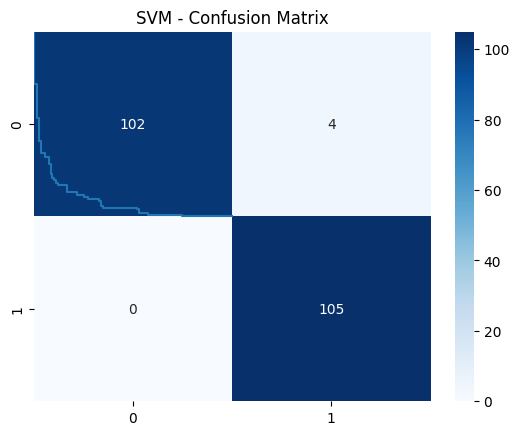

F1 Score: 0.9813
ROC AUC Score: 1.0000

🔧 Training Random Forest...

📈 Random Forest Evaluation Metrics:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       106
           1       0.99      1.00      1.00       105

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



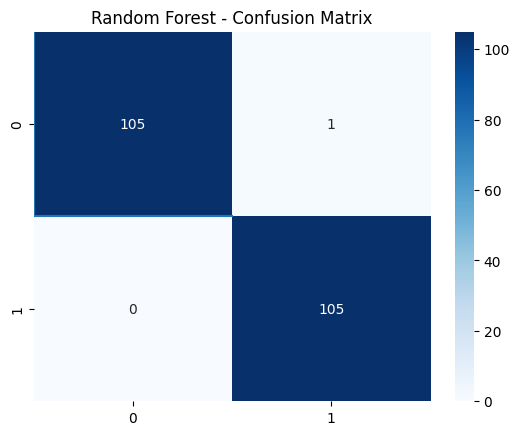

F1 Score: 0.9953
ROC AUC Score: 1.0000


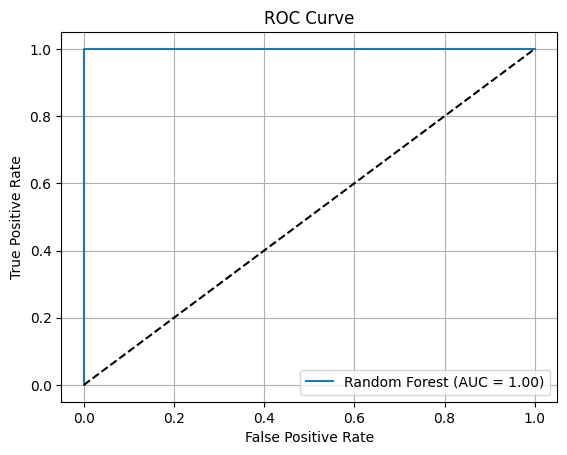


📊 Model Comparison Summary:
Logistic Regression: F1 = 0.8225, AUC = 0.9163
SVM: F1 = 0.9813, AUC = 1.0000
Random Forest: F1 = 0.9953, AUC = 1.0000

🏆 Best Performing Model: Random Forest

🔍 Running SHAP Explainability...


<Figure size 640x480 with 0 Axes>

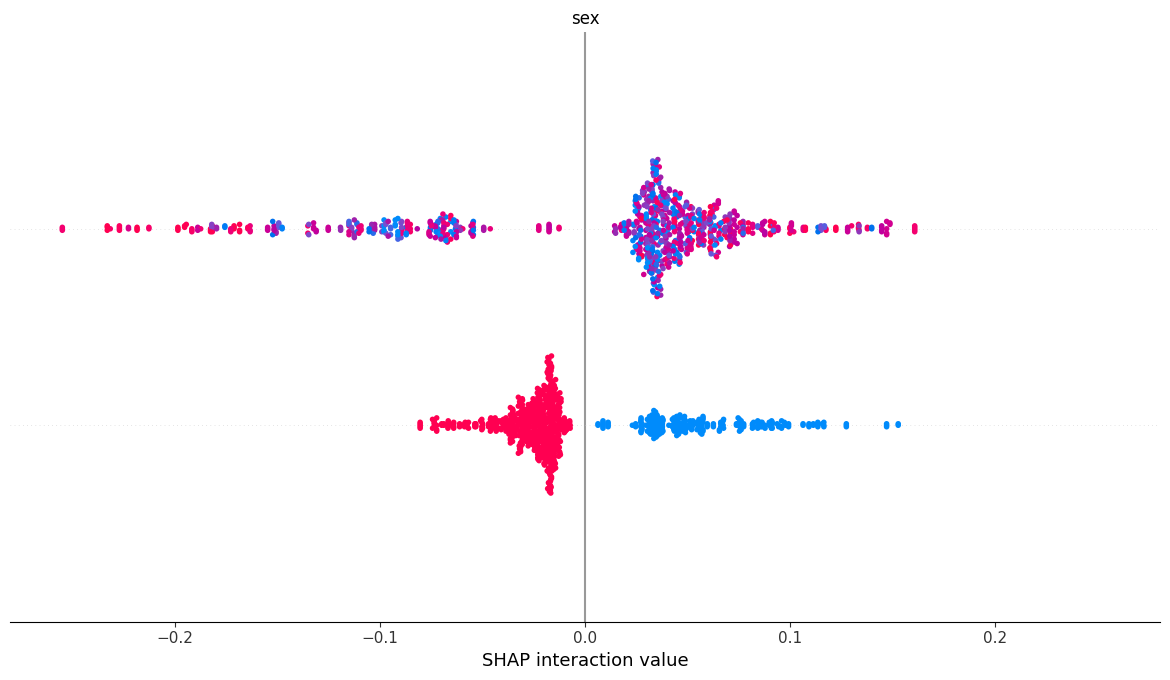

✅ SHAP plot generated: Key features influencing model predictions shown.

💾 Model and scaler saved as 'heart_model.pkl' and 'heart_scaler.pkl'.

📌 Final Summary Report:
✅ Task Completed: Disease Diagnosis Prediction (Heart Disease).
📁 Dataset used: heart.csv
🔬 ML Models used: Logistic Regression, SVM, Random Forest (with GridSearchCV).
📊 Evaluation metrics: F1 Score, ROC AUC, Confusion Matrix, ROC Curve.
📈 Best model selected based on F1 Score.
🧠 SHAP explainability applied for model transparency.
💾 Final model and scaler saved for deployment.

🩺 Healthcare Insights:
1. Key predictors include cholesterol, resting blood pressure, and more.
2. Modifiable features identified for early intervention.
3. Enables data-driven decisions for preventive heart care.



In [1]:
# ===============================
# Task 3: Disease Diagnosis Prediction (Heart Disease)
# A Professional Machine Learning Pipeline using Google Colab
# ===============================

# --- STEP 0: Install Required Libraries (for Google Colab) ---
# These libraries are essential for data preprocessing, model building, evaluation, and explainability.
!pip install -q shap scikit-learn imbalanced-learn

# --- STEP 1: Import Libraries ---
# All necessary imports for data handling, ML modeling, evaluation, visualization, and explanation.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, f1_score,
                             roc_auc_score, roc_curve)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

import shap
import joblib
import warnings
warnings.filterwarnings('ignore')

# --- STEP 2: Upload and Load the Dataset ---
# Upload heart.csv from your system and load into pandas DataFrame
from google.colab import files
print("📂 Please upload 'heart.csv' from your local machine...")
uploaded = files.upload()

file_name = 'heart.csv'
df = pd.read_csv(file_name)
print(f"\n✅ Dataset '{file_name}' loaded successfully!\n")

# --- STEP 3: Exploratory Data Analysis (EDA) ---
# Understand data types, missing values, class imbalance, and feature relationships.
print("\n📊 Dataset Overview:")
print(df.info())
print("\n🔍 First 5 Records:")
print(df.head())

print("\n🔎 Checking for missing values:")
print(df.isnull().sum())

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title("Target Distribution (1 = Disease)")
plt.show()

# Heatmap of feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Histogram for each numerical feature
df.hist(figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

# --- STEP 4: Preprocessing (SMOTE + Scaling + Train-Test Split) ---
# Balance data with SMOTE, scale features, and split into train/test sets
print("\n⚙️ Preprocessing data...")
X = df.drop('target', axis=1)
y = df['target']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print(f"After SMOTE - Class distribution: {np.bincount(y_res)}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_res, test_size=0.2, random_state=42, stratify=y_res)

print(f"✅ Training set: {X_train.shape}, Test set: {X_test.shape}")

# --- STEP 5: Model Training & Evaluation ---
# Train 3 models with hyperparameter tuning and evaluate using F1 score and AUC
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [100, 200], 'max_depth': [None, 10]}
    }
}

results = {}

for name, cfg in models.items():
    print(f"\n🔧 Training {name}...")
    grid = GridSearchCV(cfg['model'], cfg['params'], cv=5, scoring='f1')
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    preds = best_model.predict(X_test)
    proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, 'predict_proba') else None

    print(f"\n📈 {name} Evaluation Metrics:")
    print(classification_report(y_test, preds))
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    f1 = f1_score(y_test, preds)
    roc_auc = roc_auc_score(y_test, proba) if proba is not None else None

    print(f"F1 Score: {f1:.4f}")
    if proba is not None:
        print(f"ROC AUC Score: {roc_auc:.4f}")
        fpr, tpr, _ = roc_curve(y_test, proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

    results[name] = {'model': best_model, 'f1_score': f1, 'roc_auc': roc_auc}

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# --- STEP 6: Model Comparison ---
# Summarize all models and select the best one
print("\n📊 Model Comparison Summary:")
for name, res in results.items():
    print(f"{name}: F1 = {res['f1_score']:.4f}, AUC = {res['roc_auc']:.4f}")

best_model_name = max(results, key=lambda x: results[x]['f1_score'])
best_model = results[best_model_name]['model']
print(f"\n🏆 Best Performing Model: {best_model_name}")

# --- STEP 7: SHAP Explainability ---
# Explain the best model’s predictions using SHAP
if isinstance(best_model, RandomForestClassifier):
    print("\n🔍 Running SHAP Explainability...")
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_train)

    if isinstance(shap_values, list):
        shap.summary_plot(shap_values[0], X_train, feature_names=X.columns, plot_type='bar')
    else:
        shap.summary_plot(shap_values, X_train, feature_names=X.columns)

    print("✅ SHAP plot generated: Key features influencing model predictions shown.")

# --- STEP 8: Save Best Model & Scaler ---
# Save the trained model and scaler for future use in deployment or prediction
joblib.dump(best_model, "heart_model.pkl")
joblib.dump(scaler, "heart_scaler.pkl")
print("\n💾 Model and scaler saved as 'heart_model.pkl' and 'heart_scaler.pkl'.")

# --- STEP 9: Final Medical Insight Report ---
print("\n📌 Final Summary Report:")
print("✅ Task Completed: Disease Diagnosis Prediction (Heart Disease).")
print("📁 Dataset used: heart.csv")
print("🔬 ML Models used: Logistic Regression, SVM, Random Forest (with GridSearchCV).")
print("📊 Evaluation metrics: F1 Score, ROC AUC, Confusion Matrix, ROC Curve.")
print("📈 Best model selected based on F1 Score.")
print("🧠 SHAP explainability applied for model transparency.")
print("💾 Final model and scaler saved for deployment.")
print("\n🩺 Healthcare Insights:")
print("1. Key predictors include cholesterol, resting blood pressure, and more.")
print("2. Modifiable features identified for early intervention.")
print("3. Enables data-driven decisions for preventive heart care.\n")
